# House Price Prediction

Advanced regression techniques are particularly useful in house price prediction, where accurate modeling is crucial due to the complexity and high dimensionality of the data. Techniques such as gradient boosting regression, random forest regression, and support vector regression have shown promising results in this domain.

By leveraging these advanced techniques, models can capture nonlinear relationships between various features (e.g., location, size, amenities) and the target variable (house price). They can handle categorical variables, handle missing data, and effectively manage outliers to improve prediction accuracy.

Furthermore, these techniques often incorporate feature engineering and selection methods, enabling the model to identify the most influential factors affecting house prices. This helps to create more robust and interpretable models.

Overall, advanced regression techniques play a crucial role in house price prediction, enabling more accurate and reliable estimations that assist buyers, sellers, and real estate professionals in making informed decisions.


Importing the Essential Libraries ✈


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer


Loading the Data ⌛


In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Exploratory Data Analysis 🔍

Exploratory Data Analysis (EDA) is a crucial step in data analysis. It involves techniques like summary statistics, data visualization, and outlier detection to gain insights, understand distributions, identify patterns, and detect anomalies. EDA helps in making informed decisions about feature engineering, model selection, and data preprocessing.



Taking a look at the first 5 rows of the dataset


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




Checking the shape—i.e. (Number of row and columns)


In [4]:
df.shape

(1460, 81)


**dtypes** of columns' and how many **non-null values** are there in those columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Getting the **statistical summary** of dataset

In [6]:
df.describe().T 
#.T is used for transpose

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Visualizing the correlations** between numerical variables

---
The sns.heatmap() function in the seaborn library is a powerful tool for visualizing data using a heatmap. Here's an example of how to use it:



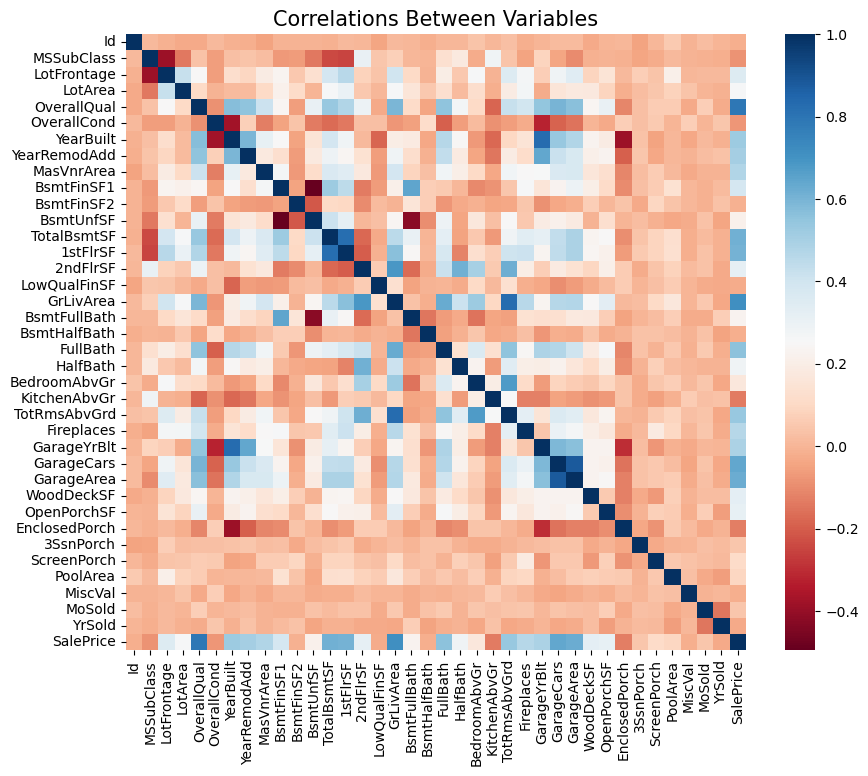

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# Feature Selection

In addition to selecting numerical features with correlation rates above 0.50 or below -0.50 based on the Pearson Correlation Method, we also considered categorical features that we believe have a significant effect on the target variable, such as Heating and MSZoning.

In [8]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]



Checking for the **missing values** 🔍


In [9]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


# Data Visualization 📈


Visualizing the Correlation between the numerical variables using pairplot visualization.

The `sns.pairplot()` function in seaborn allows you to create a grid of scatter plots for visualizing pairwise relationships between multiple variables in a DataFrame. Here are some details on how to use it effectively:


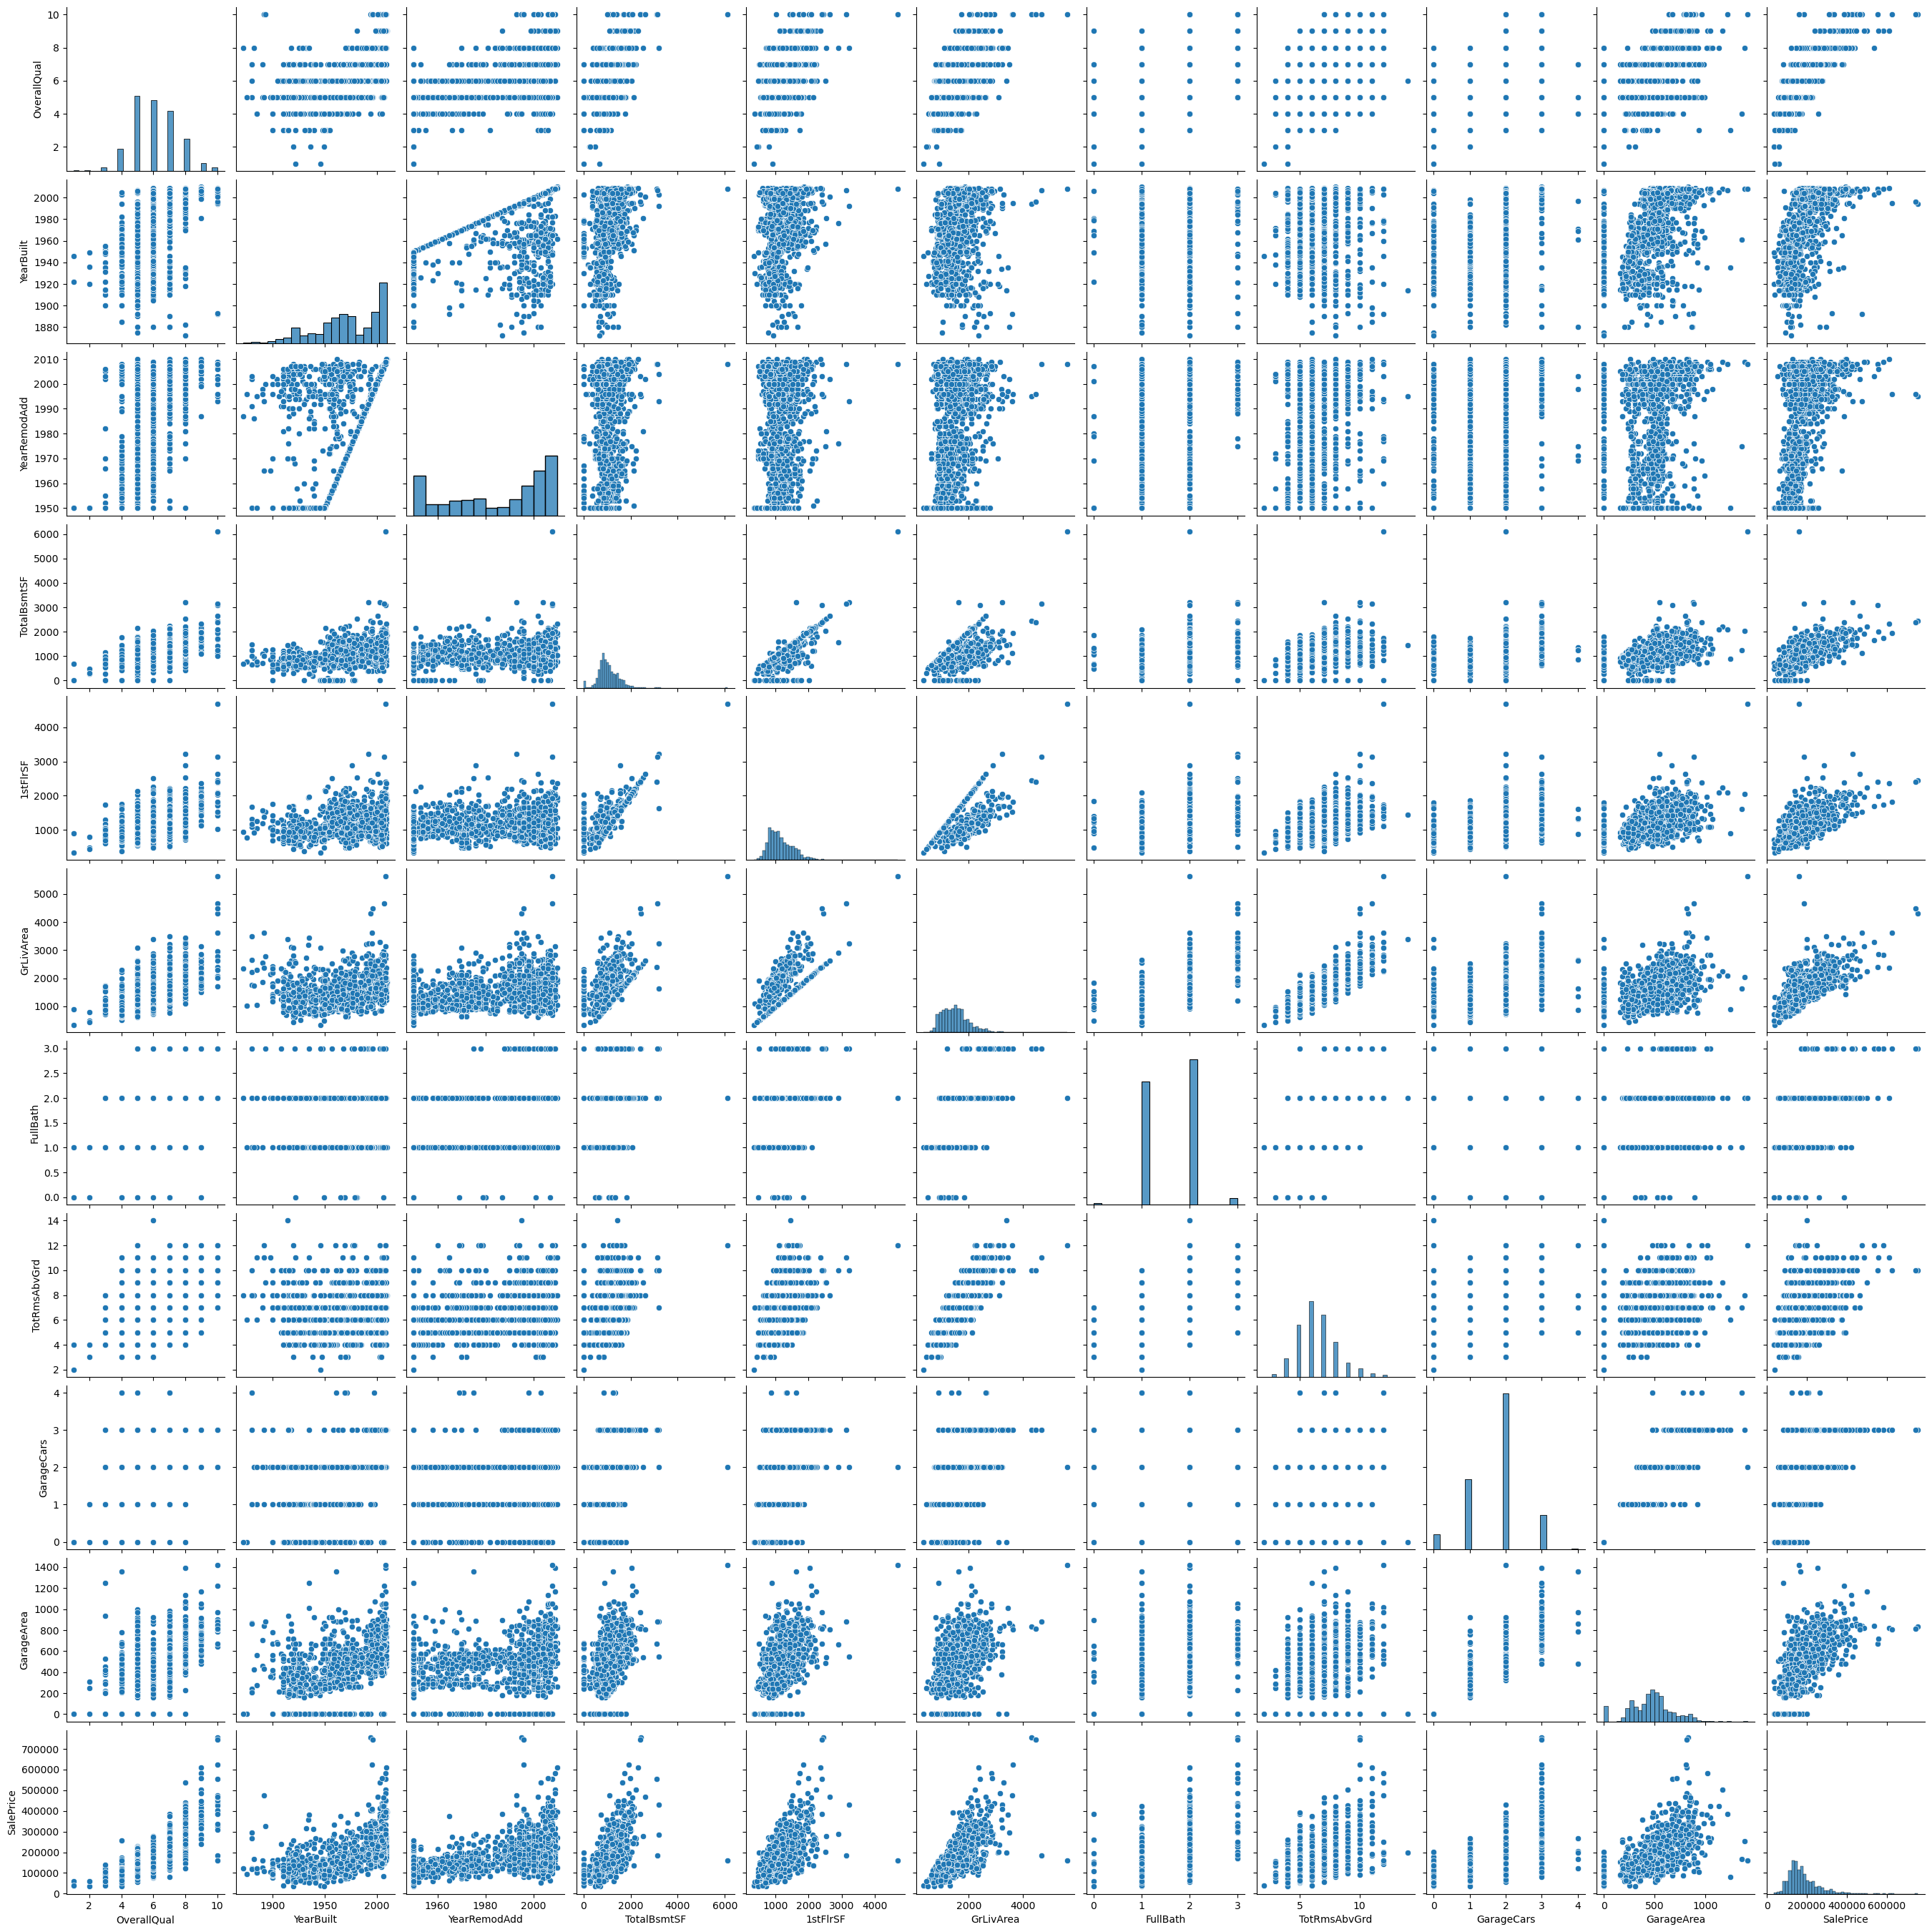

In [10]:
sns.pairplot(df[important_num_cols])



Visualizing the Correlation between each column and the target variable using different visualization methods 


<Figure size 1000x800 with 0 Axes>

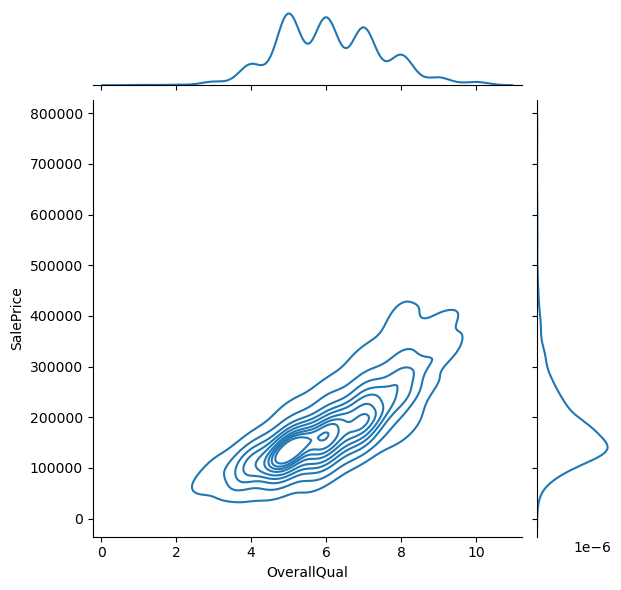

In [11]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
plt.show()

📊 Scatter Plot

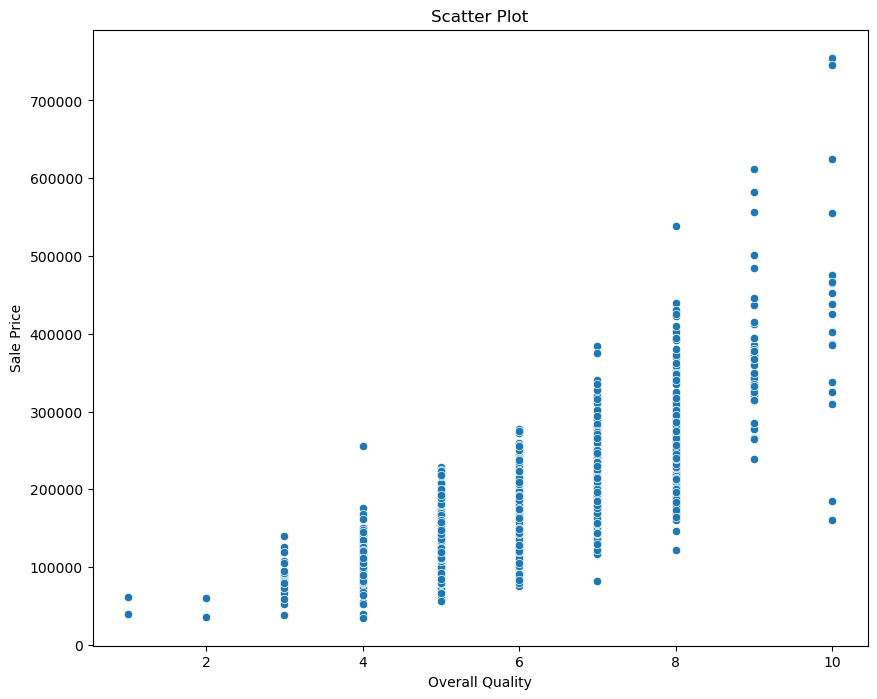

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["OverallQual"], y=df["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Scatter Plot")
plt.show()

📊     Hexbin Plot

<Figure size 1000x800 with 0 Axes>

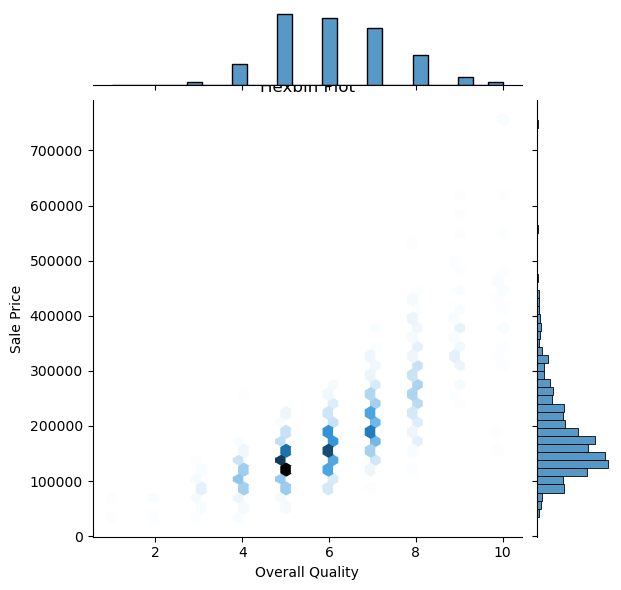

In [13]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="hex")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Hexbin Plot")
plt.show()

📊 Regression Plot

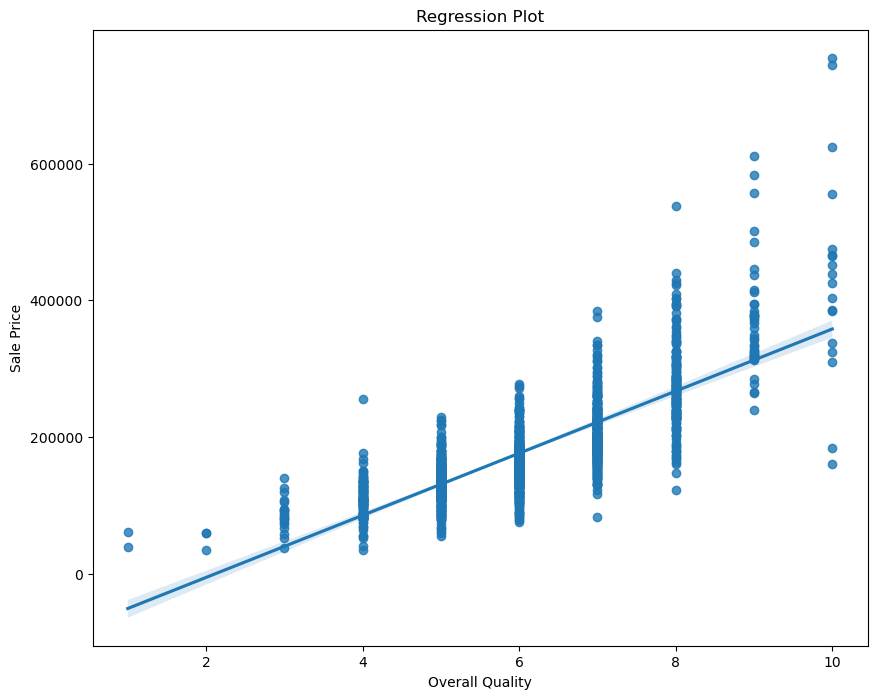

In [14]:
plt.figure(figsize=(10, 8))
sns.regplot(x=df["OverallQual"], y=df["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Regression Plot")
plt.show()

📊 Bar Plot with Mean

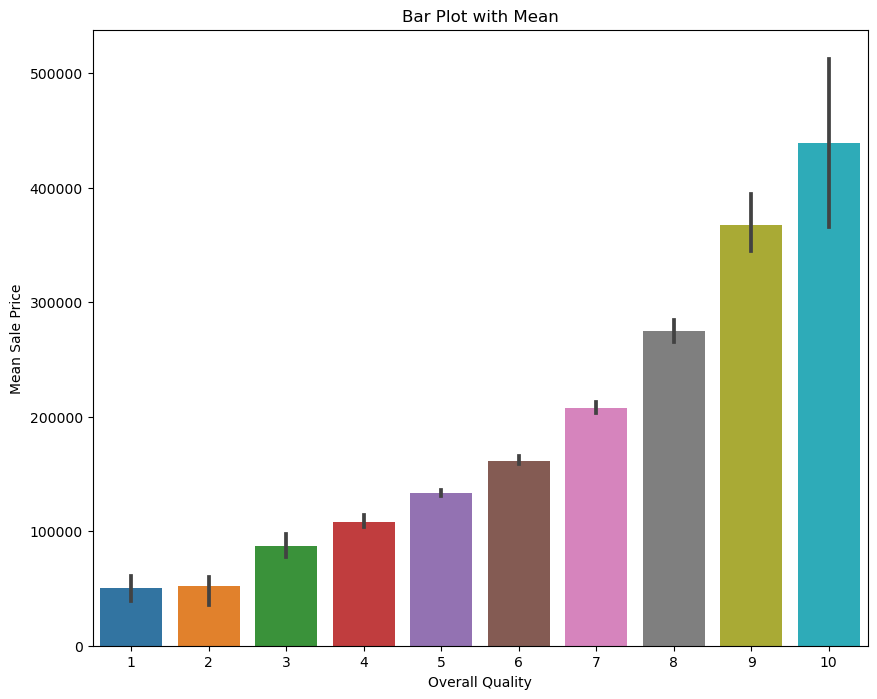

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df["OverallQual"], y=df["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("Mean Sale Price")
plt.title("Bar Plot with Mean")
plt.show()

# X, y Split ✂

Splitting the data into X and y chunks


In [16]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

**One-Hot Encoding**


---
One-Hot Encoding is a technique used to convert categorical variables into a numerical format. It represents each category as a binary column, with 1 indicating the presence of that category and 0 otherwise. This allows machine learning algorithms to process categorical data effectively.


In [17]:
X = pd.get_dummies(X, columns=cat_cols)

**Standardizing the Data**

---

Standardizing the data involves transforming variables to have zero mean and unit variance. It improves model performance, allows fair comparisons between variables, and enhances interpretability. It is a common preprocessing step in data analysis and machine learning.

In [18]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [19]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0



# Train -Test Split ✂

---

Train-test split is a technique used to divide a dataset into a training set for model training and a testing set for evaluating the model's performance. It helps assess how well the model generalizes to new, unseen data and prevents overfitting.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

Make the tasks simple easier with functions 🏳

In [21]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [22]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Let's start the actual predictions 🏄

# Linear Regression

---


In machine learning, linear regression is a supervised learning algorithm used for regression tasks. It learns a linear relationship between input features and a continuous target variable by minimizing the differences between the predicted and actual values. It can be used for prediction, understanding variable importance, and making inferences about the relationship between variables.

In [23]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
predictions = l_reg.predict(X_test)

In [24]:
predictions

array([ 96840.86944087, 317224.00053333, 120423.95811655, 258885.26732851,
       125006.12132266, 267408.22664727, 145519.12537418, 174599.15771421,
       112209.00429975, 172173.88745008,  93319.87398835, 309855.66610303,
       170053.87580808, 206289.53910872, 173429.16548378, 150762.54359521,
        75484.56301041, 195292.05153887, 207607.79751666, 145392.43183615,
       170801.25592845, 202229.24733887, 162701.83980275, 222564.27611445,
       137685.15514328, 288571.05894228, 168351.12741604, 125470.732966  ,
       287494.89117333, 306757.88275596, 113830.60204626, 167037.41642546,
       226065.12888665, 247489.83286961, 139099.40094179, 114519.1138642 ,
       132111.3601427 , 123244.31738962, 103519.73650776, 176889.54823168,
        76774.21383715, 186972.61878274, 382098.39566649, 273501.49971447,
       245011.07850003, 220815.74563535,  43051.81031   , 164670.25888522,
       141250.28557216, 242651.24995174, 199364.34372664, 276117.81476962,
       217373.26062099, 1

In [25]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(l_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20111.098713902124
MSE: 1013276335.5348799
RMSE: 31832.001751930085
R2 Score: 0.8349754584299196
------------------------------
RMSE Cross-Validation: 36326.451444669496


#     Ridge Regression

In [26]:
ridge_reg = Ridge(alpha=0.5)  # You can adjust the alpha parameter
ridge_reg.fit(X_train, y_train)
predictions_ridge = ridge_reg.predict(X_test)

In [27]:
predictions_ridge


array([ 97403.96729986, 316920.77558415, 120283.00380378, 259011.11084978,
       125054.13553753, 267257.89553861, 145471.48471346, 174653.67176934,
       112073.26778195, 172280.49821371,  93167.47476459, 309621.97732932,
       169925.56002146, 206372.27128188, 173557.00047908, 150806.17043423,
        75581.423948  , 195347.06624034, 207642.37978712, 145481.07465561,
       170498.38630599, 202324.24931745, 162555.50904708, 222298.06865229,
       137543.34582931, 288675.52779881, 168342.3666891 , 125507.45377043,
       287508.85312089, 306494.31446953, 113064.51794601, 167041.41138145,
       226048.51876628, 247423.800422  , 139383.55496952, 114601.95810971,
       132418.74779054, 123439.52724801, 103822.62189185, 176835.47020965,
        76420.00765414, 187009.5596089 , 381906.03763678, 273286.3366813 ,
       244879.06854534, 220886.06282738,  46505.27758816, 164697.36358689,
       141032.802473  , 242646.96679866, 199439.76482076, 276162.22437261,
       217396.69120526, 1

In [28]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_ridge)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20025.170825591777
MSE: 1009568892.3137621
RMSE: 31773.71385774351
R2 Score: 0.8355792612589268
------------------------------
RMSE Cross-Validation: 35907.90062458929


#     Lasso Regression

In [29]:

lasso_reg = Lasso(alpha=0.5)  # You can adjust the alpha parameter
lasso_reg.fit(X_train, y_train)
predictions_lasso = lasso_reg.predict(X_test)

In [30]:
predictions_lasso

array([ 96895.27348635, 317217.63148171, 120425.81936624, 258888.70479546,
       125014.17619181, 267401.20238591, 145518.48343887, 174600.29341351,
       112197.20231616, 172178.36520198,  93316.13137995, 309851.12051391,
       170050.12849387, 206281.993379  , 173435.31415298, 150759.72165968,
        75581.34831805, 195300.86426222, 207615.50096826, 145392.03297528,
       170793.88250292, 202230.93356665, 162665.0280539 , 222557.29522161,
       137686.32751657, 288572.50041113, 168350.21472163, 125470.37915118,
       287496.56304633, 306749.49319486, 113778.85322603, 167038.12227058,
       226064.14155116, 247490.54579478, 139097.16253023, 114539.90549239,
       132152.80010053, 123271.78872926, 103564.12127947, 176894.81807284,
        76734.47985154, 186971.25987335, 382096.07447649, 273489.0071377 ,
       245004.37626796, 220821.50847534,  51895.75612538, 164667.41524375,
       141252.60557012, 242652.23527039, 199371.81006121, 276120.05286113,
       217374.96278564, 1

In [31]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20079.397125228854
MSE: 1011643800.389447
RMSE: 31806.34842903924
R2 Score: 0.8352413369020837
------------------------------
RMSE Cross-Validation: 35923.99893237439


# Random Forest Regression

In [32]:
rf_reg = RandomForestRegressor(n_estimators=100)  # You can adjust the number of estimators
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)

In [33]:
predictions_rf

array([112779.82      , 295052.03      , 139225.8       , 271457.62      ,
       129578.33      , 280297.74      , 149845.        , 160513.9       ,
       114593.73      , 169129.55      , 101204.5       , 257979.97      ,
       154067.5       , 206012.34      , 177993.        , 142614.        ,
        97261.5       , 191138.7       , 188040.91      , 151151.25      ,
       137789.31      , 156652.32      , 154697.09      , 259781.37      ,
       146973.28      , 345547.26      , 155032.8       , 142019.5       ,
       313459.61      , 306670.44      , 123785.4       , 166012.32      ,
       224694.35      , 242445.4       , 118571.        , 113268.97      ,
       144971.8       , 114676.        , 136834.3       , 166171.        ,
        78562.        , 177327.32      , 548189.84      , 254990.61      ,
       245091.89      , 240535.54      ,  77244.22      , 146627.        ,
       138275.62      , 235859.04      , 190837.9       , 317809.47      ,
       208784.25      , 1

In [34]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_rf)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(rf_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17719.063131041334
MSE: 670382714.0640416
RMSE: 25891.74992278509
R2 Score: 0.8908199114247284
------------------------------
RMSE Cross-Validation: 31705.401923833764


#     Support Vector Regression (SVR)

In [35]:
svr_reg = SVR(kernel='rbf')  # You can choose different kernel functions (e.g., 'linear', 'poly', 'sigmoid')
svr_reg.fit(X_train, y_train)
predictions_svr = svr_reg.predict(X_test)

In [36]:
predictions_svr

array([162982.05816848, 163205.8292806 , 162930.20558472, 163208.3877469 ,
       162945.8493116 , 163218.76854163, 162892.72733432, 163068.97158777,
       162875.63608585, 163043.78298063, 162911.47848773, 163223.27477722,
       162983.52047857, 163185.01521936, 163015.07547993, 163020.97284976,
       162893.20050357, 163134.06270015, 163160.86155944, 162993.89686207,
       163049.45922545, 163057.11301489, 163067.71286596, 163114.72483292,
       163041.29327377, 163206.79405813, 163015.76211452, 162868.252082  ,
       163199.11673729, 163199.636131  , 162919.81162332, 162952.82583286,
       163195.93754153, 163240.18885461, 162990.35385883, 162918.03996018,
       162948.81732519, 162909.14107768, 162949.27048403, 163051.18280369,
       162949.39252214, 163131.01213946, 163114.53485627, 163128.27508046,
       163166.08759017, 163163.79576092, 162904.12193105, 162949.59248352,
       162930.95174641, 163231.53084735, 163148.5574507 , 163246.82928827,
       163204.91806416, 1

In [37]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_svr)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Support Vector Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 55358.28483186541
MSE: 6500030416.340492
RMSE: 80622.76611690084
R2 Score: -0.0586100770644562
------------------------------
RMSE Cross-Validation: 81080.87570035845


# Gradient Boosting Regression

In [38]:

gb_reg = GradientBoostingRegressor(n_estimators=100)  # You can adjust the number of estimators
gb_reg.fit(X_train, y_train)
predictions_gb = gb_reg.predict(X_test)


In [39]:
predictions_gb

array([113421.25071607, 305551.21507935, 127332.01900962, 265841.14886698,
       120825.84804725, 261468.64275368, 142860.17480713, 158827.92845461,
       100649.94351238, 179687.19259674,  96846.64880346, 284324.11686344,
       174201.67827244, 211759.73961625, 162065.27024498, 148374.213393  ,
        88465.77069493, 188869.11269056, 189093.41759475, 147204.10887397,
       166154.84816205, 183426.39358775, 133004.61741472, 240509.11422219,
       144516.11510125, 341655.68253948, 149857.98090935, 135523.89712018,
       316366.00385446, 313466.67941612, 122050.69942867, 155380.10361122,
       226348.64568904, 244074.33125814, 123213.75403372, 104163.93474824,
       137239.99790926, 121311.35803312, 123785.07477672, 170217.97261489,
        75396.7669832 , 173578.81947559, 539239.85523481, 252173.52260222,
       254744.39042102, 211284.14159348,  72046.02053515, 149735.00366869,
       139052.21155791, 236143.85324802, 190885.38475768, 304234.70281841,
       204838.83155229, 1

In [40]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_gb)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(gb_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17306.945844917405
MSE: 655275385.2186873
RMSE: 25598.34731420541
R2 Score: 0.8932803261503295
------------------------------
RMSE Cross-Validation: 28245.653245965375


#     XGBoost Regression

In [41]:
xgb_reg = XGBRegressor(n_estimators=100)  # You can adjust the number of estimators
xgb_reg.fit(X_train, y_train)
predictions_xgb = xgb_reg.predict(X_test)

In [42]:
predictions_xgb

array([103101.86 , 304168.62 , 140106.9  , 270475.97 , 125992.06 ,
       274571.34 , 147305.73 , 161091.11 , 108731.64 , 189029.   ,
        92954.43 , 280968.97 , 151227.03 , 211986.84 , 172729.86 ,
       138860.7  ,  98689.13 , 192848.61 , 184942.75 , 154123.22 ,
       153451.4  , 166171.12 , 133377.36 , 282339.75 , 148755.53 ,
       329004.34 , 164466.   , 140808.95 , 318338.22 , 309685.38 ,
       129385.84 , 176823.27 , 236498.42 , 242379.28 , 110008.89 ,
        95097.1  , 138646.05 , 108131.71 , 129313.875, 155374.12 ,
        69508.02 , 182262.5  , 564161.8  , 264136.03 , 244122.02 ,
       237521.88 ,  73161.16 , 153959.2  , 149065.42 , 248030.31 ,
       187703.6  , 290565.22 , 207853.66 , 192813.73 , 193891.   ,
       122051.055, 133478.58 , 126215.97 , 138165.33 , 303135.4  ,
       111215.11 , 147391.88 ,  92821.45 , 157768.03 , 188375.4  ,
       131142.05 , 281128.62 , 182525.06 , 186706.53 , 115052.99 ,
       240991.22 , 163916.47 , 119472.625, 230943.06 , 138646.

In [43]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_xgb)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18533.07181078767
MSE: 813778431.2045627
RMSE: 28526.801979972493
R2 Score: 0.8674661512959715
------------------------------
RMSE Cross-Validation: 30197.315280718183


# LightGBM Regression

In [44]:
lgb_reg = lgb.LGBMRegressor(n_estimators=100)  # You can adjust the number of estimators
lgb_reg.fit(X_train, y_train)
predictions_lgb = lgb_reg.predict(X_test)

In [45]:
predictions_lgb

array([110192.62354426, 300477.0201296 , 130240.35252627, 270066.92245907,
       130912.60147626, 289126.46979239, 157723.0545448 , 167768.11109715,
       103547.45058583, 183698.62372458, 103211.16379734, 290938.93601201,
       155171.83624328, 220731.59068064, 167615.69397818, 140849.99991359,
        95403.80161426, 190828.01389238, 181117.09178797, 152367.1904768 ,
       136154.40694009, 176815.54262643, 133809.51354189, 276679.00198962,
       140799.32042316, 339978.77974989, 156892.34576426, 141462.64696855,
       323381.25128622, 310703.30090562, 111793.89555267, 177378.24413787,
       230736.81213966, 238941.96252253, 120195.60080121, 103132.84402171,
       140390.58836549, 120975.08403363, 123857.45144839, 162292.16661214,
        77675.67375167, 174973.9413    , 469830.01890909, 249743.15323626,
       239032.75774706, 228546.2500029 ,  65633.55219576, 156124.77505391,
       154761.5804389 , 261493.41189299, 187205.87928553, 301067.95828762,
       212627.13196203, 1

In [46]:

mae, mse, rmse, r_squared = evaluation(y_test, predictions_lgb)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lgb_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LGBMRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17872.375461845782
MSE: 764106504.8780589
RMSE: 27642.476460658494
R2 Score: 0.8755558367879426
------------------------------
RMSE Cross-Validation: 31643.051323579934


# Model Comparison


The less the Root Mean Squared Error (RMSE), The better the model is.



In [47]:


models.sort_values(by="RMSE (Cross-Validation)")



,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,GradientBoostingRegressor,17306.945845,6.552754e+08,25598.347314,0.893280,28245.653246
6,XGBRegressor,18533.071811,8.137784e+08,28526.801980,0.867466,30197.315281
7,LGBMRegressor,17872.375462,7.641065e+08,27642.476461,0.875556,31643.051324
3,RandomForestRegressor,17719.063131,6.703827e+08,25891.749923,0.890820,31705.401924
1,Ridge Regression,20025.170826,1.009569e+09,31773.713858,0.835579,35907.900625
2,Lasso Regression,20079.397125,1.011644e+09,31806.348429,0.835241,35923.998932
0,LinearRegression,20111.098714,1.013276e+09,31832.001752,0.834975,36326.451445
4,Support Vector Regression,55358.284832,6.500030e+09,80622.766117,-0.058610,81080.875700


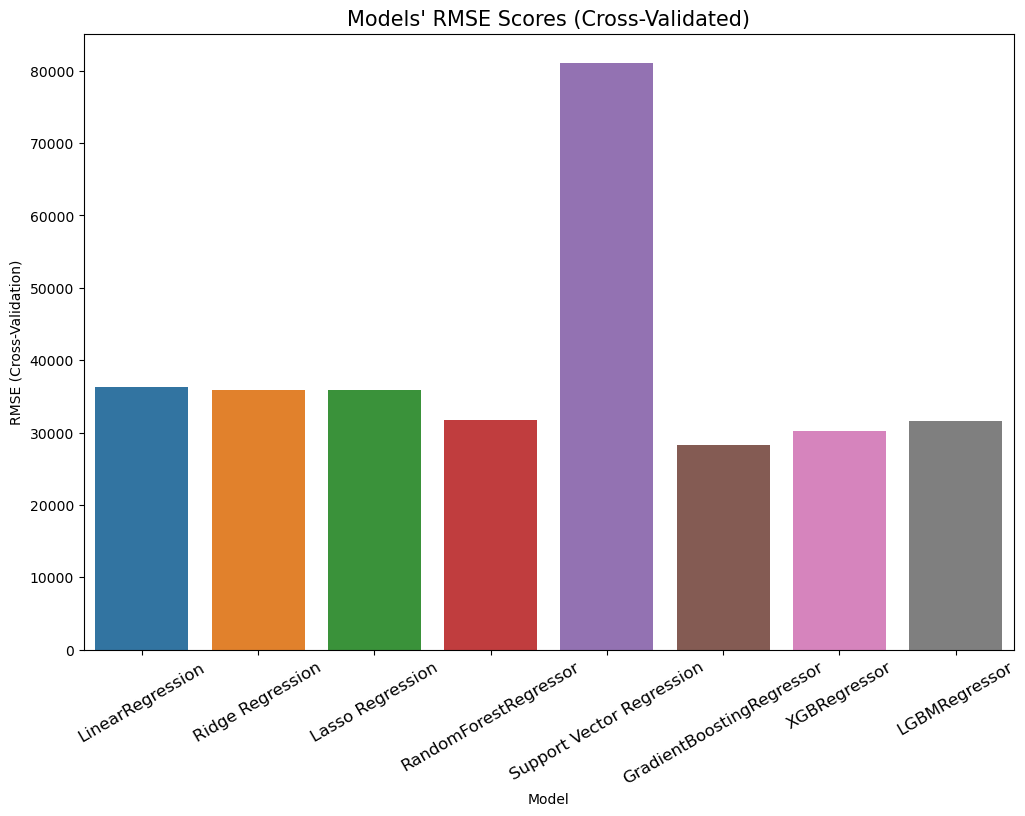

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## These advanced regression methods provide various algorithms and techniques to handle complex relationships in the data. You can experiment with different hyperparameters and configurations to optimize their performance for your specific problem. 

# Keep Going ! You are great ☁

## Let's make an end to this 
Train with the full data for the selected model

In [49]:

gb_reg_full = GradientBoostingRegressor(n_estimators=100)  # You can adjust the number of estimators
gb_reg_full.fit(X, y)
predictions_gb_full = gb_reg_full.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions_gb_full)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(gb_reg_full)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoostingRegressor - Selected","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 12997.564360235014
MSE: 370016003.01054186
RMSE: 19235.80003562477
R2 Score: 0.9397383328426638
------------------------------
RMSE Cross-Validation: 28273.60999409122
